In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 - Importação das Bibliotecas

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot

from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# 2 - Importando a base

In [3]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Machine Learning e Data Science com Python de A a Z/Estudo regressao/plano_saude.csv'
base = pd.read_csv(PATH)
base.head()

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488


# 3 - Dicionário de dados

1 - idade = idade do cliente (Variável numérica discreta)

2 - custo = valor do plano de saúde (Variável numérica discreta)

# 4 - Processamento das variáveis

## 4.1 - Seraparação das colunas e correlação

In [4]:
X = base.iloc[:, 0].values
y = base.iloc[:, 1].values

In [5]:
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

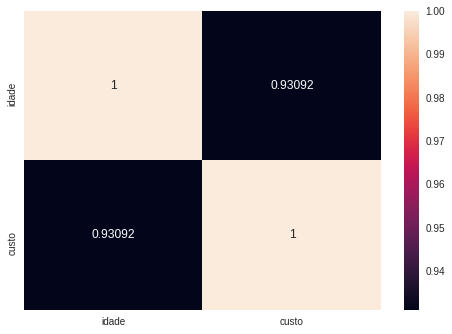

In [6]:
sns.heatmap(base.corr(), annot=True, fmt='.5g')
plt.show()

In [7]:
X = X.reshape(-1, 1)
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

# 5 - Criação do modelo

## 5.1 - Utilização de Regressão Linear

In [8]:
regressor = LinearRegression()

In [9]:
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
regressor.intercept_

-558.9490909090912

In [11]:
regressor.coef_

array([61.86787879])

## 5.2 - Plot da predição do modelo em relação aos dados

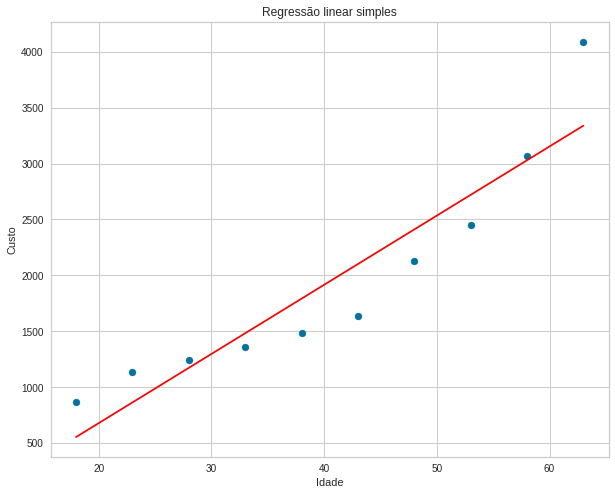

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y)
plt.title('Regressão linear simples')
plt.plot(X, regressor.predict(X), color='red')
plt.xlabel('Idade')
plt.ylabel('Custo')
plt.show()

## 5.3 - Criando uma previsão 

In [13]:
previsao1 = regressor.predict([[40]])
previsao1

array([1915.76606061])

## 5.4 - Analizando o score e o residual do modelo

In [14]:
# Testando na propria base de dados
score = regressor.score(X, y)
score

0.8666112727879174

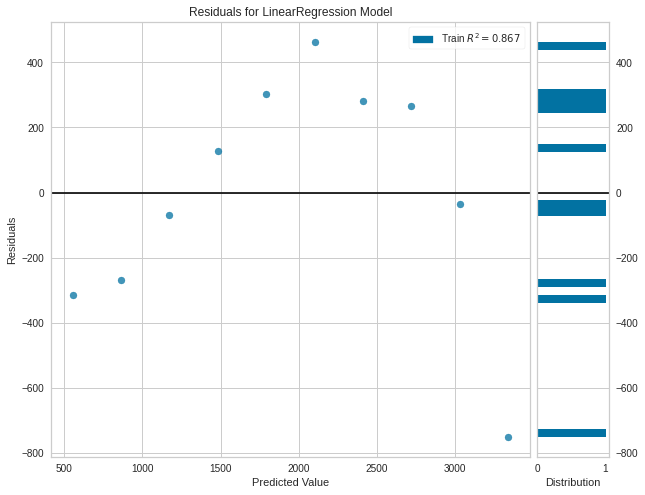

In [15]:
plt.figure(figsize=(10, 8))
visualizador = ResidualsPlot(regressor)
visualizador.fit(X, y)
visualizador.poof()